#**Project Information :**


####Name : Muhtasim Shafi Kader ,                       ID : 181-15-10809





**Project Description :**

## I'm working on **A comparison analysis of different data mining technique for weather prediction**.
Weather Status Prediction of Dhaka City with the help of some Data Mining techniques and Machine Learning Alogorthms to analyzing all weather informations including particular models

Some Machine Learning algorithms have used to build models to predict weather status by analyzing Temperature ( °c), Wind (km/h), Gust (km/h), Rain (mm), Humidity (%), Pressure (mb) data.

####*DataSet Mood: Private*

####*DataSet Making Process:* Manually

####*DataSet Description:* italicized text

There are **Seven features** and **one Target Class**

Target Class is containing the following **9** category ,

  'Moderate Rain' = 0

  'Thundershower' = 1

  'Heavy Rain' = 2
  
  'Thunder Outbreaks Possible' = 3

  'Cloudy' = 4

  'Moderate or Heavy Rain' = 5

  'Clear or Sunny' = 6

  'Light Rain' = 7

  'Partly Cloudy' = 8

#####**Importing Necessary Packages**

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA # for PCA calculation
import plotly.express as px
from sklearn.metrics import plot_confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,average_precision_score,recall_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder,MinMaxScaler

from sklearn.feature_selection import SelectKBest,chi2
from sklearn import preprocessing

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#####**Import DataSet**

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving new1.xlsx to new1.xlsx


#####**Reading Imported DataSet**

In [ ]:
df = pd.read_excel('new1.xlsx')
df.head(15)


,Temperature ( °c),Wind (km/h),Gust (km/h),Rain (mm),Humidity (%),Pressure (mb),Status
0,21.0,7,13,0.0,54,1016,Partly Cloudy
1,20.0,9,16,0.0,58,1016,Partly Cloudy
2,19.0,9,15,0.0,64,1016,Partly Cloudy
3,24.0,5,6,0.0,56,1020,Partly Cloudy
4,28.0,6,6,0.0,56,1019,Partly Cloudy
5,30.0,8,9,0.0,39,1016,Partly Cloudy
6,26.0,9,15,0.0,49,1016,Partly Cloudy
7,24.0,9,14,0.0,57,1018,Partly Cloudy
8,22.0,6,9,0.0,65,1019,Partly Cloudy
9,21.0,9,14,0.0,71,1019,Partly Cloudy


####**Detarming DataTypes of all informations**

In [ ]:
df.shape()

(2192, 7)

In [ ]:
df.describe()

,Temperature ( °c),Wind (km/h),Gust (km/h),Rain (mm),Humidity (%),Pressure (mb)
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.00000
mean,28.946305,13.343522,18.919252,0.927737,60.120894,1008.11177
std,4.775860,7.842421,10.989658,2.534902,19.337958,197.24348
min,3.300000,0.000000,0.000000,0.000000,9.000000,98.00000
25%,27.000000,8.000000,11.000000,0.000000,45.000000,1002.00000
50%,29.000000,13.000000,17.000000,0.000000,62.000000,1005.00000
75%,32.000000,17.000000,25.000000,0.600000,77.000000,1011.00000
max,43.000000,174.000000,145.000000,59.700000,92.000000,10011.00000


In [ ]:
df.corr()

,Temperature ( °c),Wind (km/h),Gust (km/h),Rain (mm),Humidity (%),Pressure (mb)
Temperature ( °c),1.000000,0.256988,0.209174,0.068339,-0.215620,-0.064240
Wind (km/h),0.256988,1.000000,0.790451,0.181984,0.296561,-0.020498
Gust (km/h),0.209174,0.790451,1.000000,0.358197,0.408567,-0.014627
Rain (mm),0.068339,0.181984,0.358197,1.000000,0.275989,-0.013177
Humidity (%),-0.215620,0.296561,0.408567,0.275989,1.000000,-0.020672
Pressure (mb),-0.064240,-0.020498,-0.014627,-0.013177,-0.020672,1.000000


In [ ]:
nullValueCheck = pd.notnull(df) 
df[nullValueCheck]   

####**Visulalization**

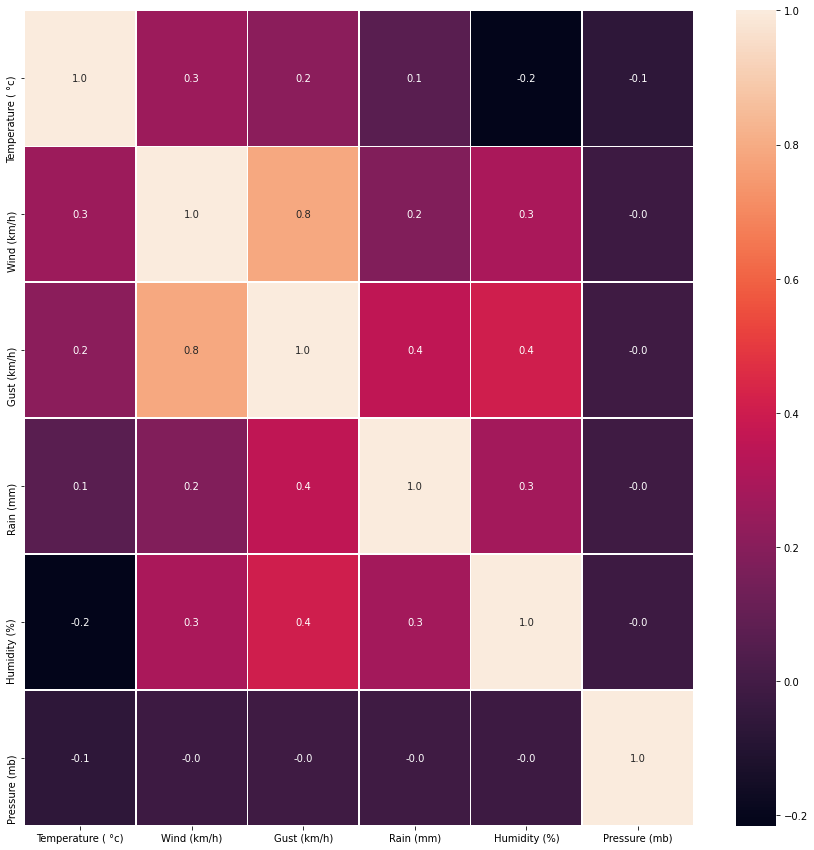

In [ ]:
corr = df.corr()
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
df['Pressure (mb)'].dtypes


dtype('int64')

#####**Checking the Datatypes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature ( °c)  2192 non-null   float64
 1   Wind (km/h)        2192 non-null   int64  
 2   Gust (km/h)        2192 non-null   int64  
 3   Rain (mm)          2192 non-null   float64
 4   Humidity (%)       2192 non-null   int64  
 5   Pressure (mb)      2192 non-null   int64  
 6   Status             2192 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 120.0+ KB


#####**Determining Attributes and Labels from DataSet**

In [ ]:
X = df.iloc[ : ,  : -1].values
y = df.iloc[ : , -1].values

#####**Spliting the DataSet into TrainSet & TestSet**



#####TrainSet Size: **80%**

#####TestSet Size: **20%**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21)

#####**Scaling The features**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#####**Traing & Predicting Using KNN** ML Algo Start

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#####**Evaluating KNN**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 17   1   0   1   0   0  30   0   0]
 [  1   9   0   3   0   0  13   0   0]
 [  0   0   8   0   0   2   0   0   0]
 [  2   5   0  79   0   0  30   0   1]
 [  0   0   0   1   0   1   0   0   0]
 [  0   0   0   3   0  37   0   0   0]
 [ 18   3   0  11   0   0 146   0   0]
 [  1   0   0   2   0   0   4   0   1]
 [  0   2   0   2   0   0   5   0   0]]
                             precision    recall  f1-score   support

             Clear or Sunny       0.44      0.35      0.39        49
                     Cloudy       0.45      0.35      0.39        26
                 Heavy Rain       1.00      0.80      0.89        10
                 Light Rain       0.77      0.68      0.72       117
              Moderate Rain       0.00      0.00      0.00         2
     Moderate or Heavy Rain       0.93      0.93      0.93        40
              Partly Cloudy       0.64      0.82      0.72       178
              Thundershower       0.00      0.00      0.00         8
Thundery Outbreaks Possibl

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#####**Traing & Predicting Using Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

#####**Evaluating Decision Tree**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 24   2   0   0   0   0  23   0   0]
 [  0  13   0   0   0   0  12   0   1]
 [  0   0   9   1   0   0   0   0   0]
 [  0   0   0 108   4   0   1   3   1]
 [  0   0   0   1   0   1   0   0   0]
 [  0   0   0   0   1  39   0   0   0]
 [ 26  12   0   2   0   0 131   0   7]
 [  0   0   0   6   1   0   0   1   0]
 [  0   1   0   2   0   0   5   0   1]]
                             precision    recall  f1-score   support

             Clear or Sunny       0.48      0.49      0.48        49
                     Cloudy       0.46      0.50      0.48        26
                 Heavy Rain       1.00      0.90      0.95        10
                 Light Rain       0.90      0.92      0.91       117
              Moderate Rain       0.00      0.00      0.00         2
     Moderate or Heavy Rain       0.97      0.97      0.97        40
              Partly Cloudy       0.76      0.74      0.75       178
              Thundershower       0.25      0.12      0.17         8
Thundery Outbreaks Possibl

#####**Training & Predicting Using RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

#####**Evaluating RandomForest**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 14   0   0   0   0   0  35   0   0]
 [  0  12   0   0   0   0  14   0   0]
 [  0   0   9   1   0   0   0   0   0]
 [  0   0   0 115   0   0   1   1   0]
 [  0   0   0   1   0   1   0   0   0]
 [  0   0   0   0   0  40   0   0   0]
 [ 11   3   0   0   0   0 164   0   0]
 [  0   0   0   8   0   0   0   0   0]
 [  0   0   0   3   0   0   6   0   0]]
                             precision    recall  f1-score   support

             Clear or Sunny       0.56      0.29      0.38        49
                     Cloudy       0.80      0.46      0.59        26
                 Heavy Rain       1.00      0.90      0.95        10
                 Light Rain       0.90      0.98      0.94       117
              Moderate Rain       0.00      0.00      0.00         2
     Moderate or Heavy Rain       0.98      1.00      0.99        40
              Partly Cloudy       0.75      0.92      0.82       178
              Thundershower       0.00      0.00      0.00         8
Thundery Outbreaks Possibl

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#####**Training & Predicting Using Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

#####**Evaluating Gradient Boosting**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 17   0   0   0   0   0  32   0   0]
 [  0   9   0   0   0   0  17   0   0]
 [  0   0   9   1   0   0   0   0   0]
 [  0   0   0 114   1   1   1   0   0]
 [  0   0   0   1   0   1   0   0   0]
 [  0   0   0   0   1  39   0   0   0]
 [ 14   4   0   0   0   0 158   0   2]
 [  0   0   0   7   1   0   0   0   0]
 [  0   0   0   3   0   0   5   0   1]]
                             precision    recall  f1-score   support

             Clear or Sunny       0.55      0.35      0.42        49
                     Cloudy       0.69      0.35      0.46        26
                 Heavy Rain       1.00      0.90      0.95        10
                 Light Rain       0.90      0.97      0.94       117
              Moderate Rain       0.00      0.00      0.00         2
     Moderate or Heavy Rain       0.95      0.97      0.96        40
              Partly Cloudy       0.74      0.89      0.81       178
              Thundershower       0.00      0.00      0.00         8
Thundery Outbreaks Possibl

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#####**Training & Predicting Using Support Vector Machine Classifier**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

#####**Evaluating Support Vector Machine**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   0   0   0   0  49   0   0]
 [  0   0   0   0   0   0  26   0   0]
 [  0   0  10   0   0   0   0   0   0]
 [  0   0   0  81   0   1  35   0   0]
 [  0   0   0   1   0   1   0   0   0]
 [  0   0   0   2   0  38   0   0   0]
 [  0   0   0   0   0   0 178   0   0]
 [  0   0   0   6   0   0   2   0   0]
 [  0   0   0   0   0   0   9   0   0]]
                             precision    recall  f1-score   support

             Clear or Sunny       0.00      0.00      0.00        49
                     Cloudy       0.00      0.00      0.00        26
                 Heavy Rain       1.00      1.00      1.00        10
                 Light Rain       0.90      0.69      0.78       117
              Moderate Rain       0.00      0.00      0.00         2
     Moderate or Heavy Rain       0.95      0.95      0.95        40
              Partly Cloudy       0.60      1.00      0.75       178
              Thundershower       0.00      0.00      0.00         8
Thundery Outbreaks Possibl

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

